# 1.0 Project Overview

## 1.1  About

The dataset consists of 10127 rows of bank churners. This project involves studying the behavior of customers that may churn. 

For this dataset, we will use the Random Forest model to predict customer churns as this model is robust and handles both numerical and categorical data well.

This project is carried out in a sequence of steps, the first of which consists of an exploratory analysis, where the objective is to know the behavior of the variables and to analyze attributes that indicate a strong relationship with the cancellation of credit card service customers. After the second part, which consists of applying resource engineering techniques, the third act consists of applying a machine learning algorithm to find the best resources for building the model. At the end of the project, after the completion of all steps, a machine learning model will be developed, capable of predicting, based on the data of a system, whether a customer will leave the credit card service or not.

## Data Libraries

| Header 1 | Header 2 |
|----------|----------|
| <b>CLIENTNUM</b> | Client number. Unique identifier for the customer holding the account|
| <b>Attrition_Flag</b> | Internal event (customer activity) variable - if the account is closed then 1 else 0| 
| <b>Customer_Age</b> | Demographic variable - Customer's Age in Years| 
| <b>Gender</b> | Demographic variable - M=Male, F=Female| 
| <b>Dependent_count</b> | Demographic variable - Number of dependents| 
| <b>Education_Level</b> | Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)| 
| <b>Marital_Status</b> | Demographic variable - Married, Single, Divorced, Unknown| 
| <b>Income_Category</b> | Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >| 
| <b>Card_Category</b> | Product Variable - Type of Card (Blue, Silver, Gold, Platinum)| 
| <b>Months_on_book</b> | Period of relationship with bank| 
| <b>Total_Relationship_Count</b> | Total no. of products held by the customer| 
| <b>Months_Inactive_12_mon</b> | No. of months inactive in the last 12 months| 
| <b>Contacts_Count_12_mon</b> | No. of Contacts in the last 12 months| 
| <b>Credit_Limit</b> | Credit Limit on the Credit Card| 
| <b>Total_Revolving_Bal</b> | Total Revolving Balance on the Credit Card| 
| <b>Avg_Open_To_Buy</b> | Open to Buy Credit Line (Average of last 12 months)| 
| <b>Total_Amt_Chng_Q4_Q1</b> | Change in Transaction Amount (Q4 over Q1)| 
| <b>Total_Trans_Amt</b> | Total Transaction Amount (Last 12 months)| 
| <b>Total_Trans_Ct</b> | Total Transaction Count (Last 12 months)| 
| <b>Total_Ct_Chng_Q4_Q1</b> | Change in Transaction Count (Q4 over Q1)| 
| <b>Avg_Utilization_Ratio</b> | Average Card Utilization Ratio| 

## 1.2 Importing Libraries

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')  
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


random_state = 42

## 1.3 Data Collection

In [8]:
# Defining dataframe
df = pd.read_csv(r"C:\Users\chunt\OneDrive\Documents\[01] Data Science\[02] Projects\[01] Machine Learning\[03] Bank Churners Prediction\BankChurners.csv")

df

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\chunt\\OneDrive\\Documents\\[01] Data Science\\[02]_Projects\\[01] Data Analysis\\[03] Bank Churners\\BankChurners.csv'

## 1.4  Data Cleaning

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

There are a total of 22 attributes and the target variable which indicates whether the customer has churned

In [45]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [46]:
# Checking for null values
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

There is a total of 1112 null values in income_category attribute. 

In [47]:
# drop null values
df.dropna(inplace=True)

# count null values in each attribute
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

Dropna function is used to drop observations with null values. This method is suitable only when the dataset is large enough and null values are insignificant

In [48]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [49]:
# Renaming all headers with lowercase
df.columns = df.columns.str.lower()
df

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Renaming headers to lowercase

In [50]:
# Drop unused columns
drop_columns = df.drop(columns=['clientnum', 
                                 'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1', 
                                 'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2'],
                                 inplace=True)
print(df.columns)

Index(['attrition_flag', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')


clientnum, naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1,
naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2,
are no use to our model and can be drop

In [51]:
# Defining variables
continuous_vars = [
    'customer_age', 
    'dependent_count', 
    'months_on_book', 
    'total_relationship_count', 
    'months_inactive_12_mon', 
    'contacts_count_12_mon', 
    'credit_limit', 
    'total_revolving_bal', 
    'avg_open_to_buy', 
    'total_amt_chng_q4_q1', 
    'total_trans_amt', 
    'total_trans_ct', 
    'total_ct_chng_q4_q1', 
    'avg_utilization_ratio'
]

categorical_vars = [
    'gender', 
    'education_level', 
    'marital_status', 
    'income_category', 
    'card_category'
]

categorical_vars_non_ord = [ 
    'gender', 
    'marital_status'
]

categorical_vars_ord = [
    'attrition_flag',
    'education_level', 
    'income_category', 
    'card_category'
]
print(f"Variables in continuous_var")
print(continuous_vars, "\n")

print(f"Variables in categorical_vars")
print(categorical_vars, "\n")

print(f"Variables in categorical_vars_non_ord")
print(categorical_vars_non_ord, "\n")

print(f"Variables in categorical_vars_ord")
print(categorical_vars_ord, "\n")

# Print categorical_vars_ord
print(df['card_category'].unique())
print(df['education_level'].unique())
print(df['income_category'].unique())

Variables in continuous_var
['customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'] 

Variables in categorical_vars
['gender', 'education_level', 'marital_status', 'income_category', 'card_category'] 

Variables in categorical_vars_non_ord
['gender', 'marital_status'] 

Variables in categorical_vars_ord
['attrition_flag', 'education_level', 'income_category', 'card_category'] 

['Blue' 'Gold' 'Silver' 'Platinum']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


In [52]:
df

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# 2.0 Data Preprocessing

## 2.1 Label Encoding

In [53]:
# Label Encoding for categorical variable

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical variable

# Manual mapping for encoding
mappings = {
    'education_level' : {'Unknown':0,'Uneducated':1,'High School':2,'Graduate':3,'College':4,'Post-Graduate':5,'Doctorate':6},
    'income_category' : {'Less than $40K':0,'$40K - $60K':1,'$60K - $80K':2,'$80K - $120K':3,'$120K +':4}, 
    'card_category' : {'Blue':0,'Silver':1,'Gold':2,'Platinum':3}, 
    'marital_status' : {'Single':0, 'Married':1 , 'Unknown': 2},
    'attrition_flag' : {'Existing Customer':0,'Attrited Customer':1}
}

for col, mapping in mappings.items():
    df[col] = df[col].map(mapping)

for col in categorical_vars_non_ord:
    df[col] = label_encoder.fit_transform(df[col])

# Print unique values in the specified column for both DataFrames
column_name = 'education_level'  # Replace with the actual column name


df

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,0,45,1,3,2,1,2.0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,0,0.0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,1,3.0,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,2,2,0.0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,1,1,2.0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,1,2,3,0,1.0,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,1,2,0,3,1.0,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,0,1,2,1,0.0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,1,2,3,2,1.0,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## 2.2 Splitting df

## 2.3 Adrresing Class Imbalance

In [56]:
y_train.value_counts()

attrition_flag
0    6071
1    1141
Name: count, dtype: int64

Class imbalance occurs when the classes in a dataset are not represented equally. This can caused bias towards the majority class, causing overall high accuracy but poor performance on the minority class

In [57]:
from imblearn.over_sampling import SMOTE

y_train.value_counts()

# Initialize SMOTE with the correct parameter name
over = SMOTE(sampling_strategy='auto', random_state=random_state)  # Ensure random_state is defined

# Apply SMOTE to balance the dataset
X_train, y_train = over.fit_resample(X_train, y_train)

# Print the value counts of the target variable after resampling
print(y_train.value_counts())

# Recreate train_df from the resampled data
train_df = pd.concat([X_train, y_train], axis=1)
df.head()

attrition_flag
0    6071
1    6071
Name: count, dtype: int64


,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,0,45,1,3,2,1,2.0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,0,0.0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,1,3.0,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,2,2,0.0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,1,1,2.0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# 3.0 EDA

# 4.0 Feature Engineering

# 5.0 Data Splitting

In [ ]:
# Defining features and target variable
X = df.drop('attrition_flag', axis=1)  # Features
y = df['attrition_flag']  # Target variable

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Combine features and target variable back into train_df and test_df

In [ ]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure y_train is also filtered
X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Ensure y_train is also filtered


print(X_train.isnull().sum())
print(X_train.isnull().sum())

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical variable
# for col in categorical_vars_ord:
#     train_df[col] = label_encoder.fit_transform(train_df[col])

# Print unique values in the specified column for both DataFrames
column_name = 'attrition_flag'  # Replace with the actual column name

print(f"Unique values in '{column_name}' in df:")
print(df[column_name].unique())

print(f"\nUnique values in '{column_name}' in train_df:")
print(train_df[column_name].unique())

train_df['attrition_flag'].value_counts()

train_df

Unique values in 'attrition_flag' in df:
[0 1]

Unique values in 'attrition_flag' in train_df:
[0 1]


,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag
0,45,0,4,0,0,0.000000,2,36,6,1,3,15987.000000,1648,14339.000000,0.732000,1436,36,1.250000,0.103000,0
1,34,0,2,3,0,0.000000,0,36,4,3,4,3625.000000,2517,1108.000000,1.158000,2616,46,1.300000,0.694000,0
2,49,0,2,2,1,1.000000,0,39,5,3,4,2720.000000,1926,794.000000,0.602000,3806,61,0.794000,0.708000,0
3,60,0,0,6,1,0.000000,0,45,5,2,4,1438.300000,648,790.300000,0.477000,1267,27,1.077000,0.451000,0
4,52,0,2,0,0,1.000000,0,45,3,1,3,3476.000000,1560,1916.000000,0.894000,3496,58,0.871000,0.449000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12137,44,1,3,2,0,2.000000,0,38,5,3,2,12888.635523,0,12888.635523,0.577580,2230,51,0.549381,0.000000,1
12138,41,1,2,4,0,2.252684,0,36,5,3,4,18490.611248,1301,17189.494096,0.391575,1666,37,0.414270,0.069731,1
12139,58,0,1,1,0,0.000000,0,49,1,4,3,5032.284732,749,4283.131410,0.815503,10103,67,0.794238,0.148591,1
12140,49,0,1,4,0,0.000000,0,34,2,2,2,3005.174129,2517,488.174129,0.613091,2429,47,0.497989,0.837571,1


# 6.0 Model Training

This project will be using random forest classifier to our modelling. 

In [ ]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

# 7.0 Model Evaluation

In [ ]:
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.954520244037715
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1504
           1       0.87      0.86      0.86       299

    accuracy                           0.95      1803
   macro avg       0.92      0.92      0.92      1803
weighted avg       0.95      0.95      0.95      1803

Confusion Matrix:
[[1464   40]
 [  42  257]]


In [ ]:
importance = model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_names = X_train.columns  # Assuming you are using the original X_train for column names
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Sort the DataFrame by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print feature importances
print("Feature importances:")
for i, row in feature_importance_df.iterrows():
    print(f'Feature: {row["Feature"]}, Score: {row["Importance"]:.4f}')

Feature importances:
Feature: total_trans_ct, Score: 0.2174
Feature: total_trans_amt, Score: 0.2000
Feature: total_revolving_bal, Score: 0.1016
Feature: total_ct_chng_q4_q1, Score: 0.0938
Feature: total_relationship_count, Score: 0.0664
Feature: avg_utilization_ratio, Score: 0.0662
Feature: total_amt_chng_q4_q1, Score: 0.0529
Feature: credit_limit, Score: 0.0295
Feature: avg_open_to_buy, Score: 0.0285
Feature: customer_age, Score: 0.0230
Feature: gender, Score: 0.0229
Feature: income_category, Score: 0.0216
Feature: months_on_book, Score: 0.0164
Feature: months_inactive_12_mon, Score: 0.0161
Feature: contacts_count_12_mon, Score: 0.0148
Feature: marital_status, Score: 0.0104
Feature: dependent_count, Score: 0.0089
Feature: education_level, Score: 0.0082
Feature: card_category, Score: 0.0015


In [6]:
df.head


NameError: name 'df' is not defined

# 8.0 Model Deployment

This section divides into two part:
1) Saving the model using *joblib*
2) 

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'random_forest_model.pkl')
print(model.feature_names_in_)

['customer_age' 'gender' 'dependent_count' 'education_level'
 'marital_status' 'income_category' 'card_category' 'months_on_book'
 'total_relationship_count' 'months_inactive_12_mon'
 'contacts_count_12_mon' 'credit_limit' 'total_revolving_bal'
 'avg_open_to_buy' 'total_amt_chng_q4_q1' 'total_trans_amt'
 'total_trans_ct' 'total_ct_chng_q4_q1' 'avg_utilization_ratio']


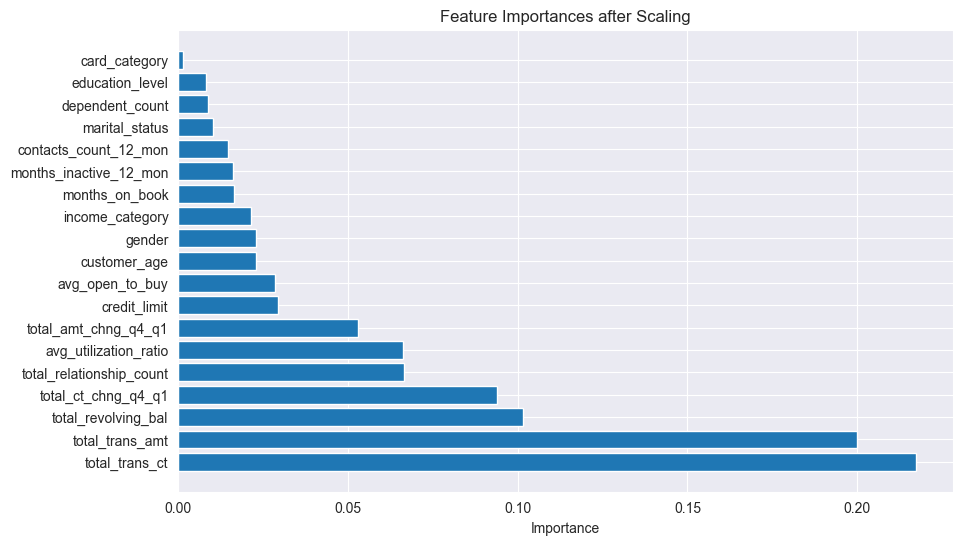

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances after Scaling')
plt.show()